In [1]:
try:
    import xarray
except ModuleNotFoundError:
    %pip install xarray
    import xarray

try:
    import ramanchada2 as rc2
except ModuleNotFoundError:
    %pip install ramanchada2
    import ramanchada2 as rc2

import matplotlib.pyplot as plt
import numpy as np

<Axes: >

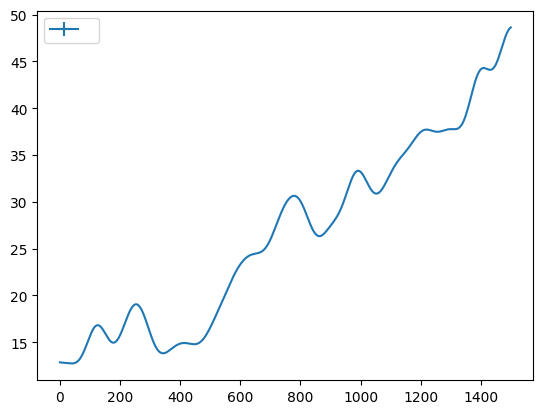

In [2]:
baseline = rc2.spectrum.from_delta_lines(deltas={}, xcal=lambda x: x*.5, nbins=3000)
baseline = baseline.add_baseline(n_freq=50, amplitude=10, pedestal=10, func=lambda x: x*.006 + x**2*.00001)
baseline.plot()

<Axes: >

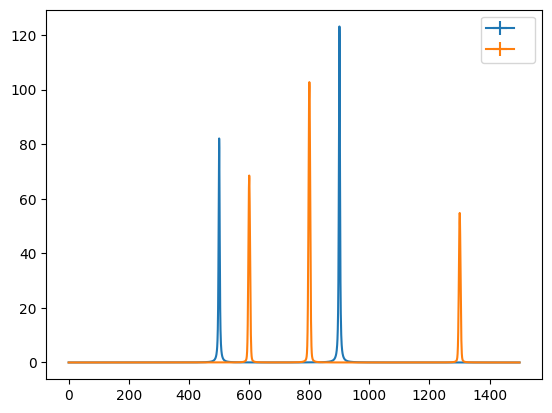

In [3]:
spe_e1 = rc2.spectrum.from_delta_lines(deltas={500:1e3, 900:1.5e3}, xcal=lambda x: x*.5, nbins=3000).convolve(lineshape='voigt', sigma=2, gamma=3)
spe_e2 = rc2.spectrum.from_delta_lines(deltas={600:1e3, 800:1.5e3, 1300:.8e3}, xcal=lambda x: x*.5, nbins=3000).convolve(lineshape='voigt', sigma=5, gamma=1)
ax = spe_e1.plot()
spe_e2.plot(ax=ax)

In [4]:
spe_map = {}
for conc in np.linspace(.3, .7, 5, endpoint=True):
    s = spe_e1*conc + spe_e2*(1-conc)
    s += baseline
    s = s.add_poisson_noise(.025).add_gaussian_noise(1)
    spe_map[conc] = s

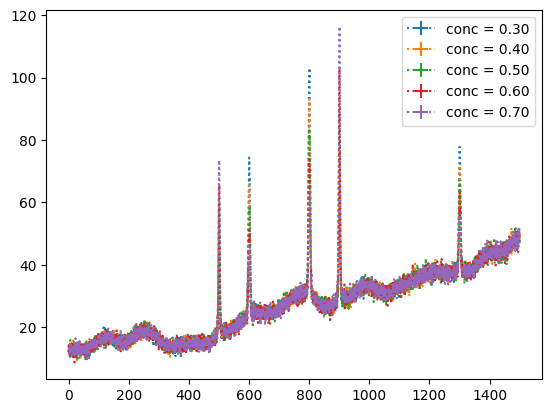

In [5]:
fig, ax = plt.subplots()
for c, s in spe_map.items():
    s.plot(ax=ax, fmt=':', label=f'conc = {c:.2f}')

In [6]:
conc = list(spe_map.keys())
xarray.DataArray(data=[s.y for s in spe_map.values()],
                 dims=['Concentration', 'Raman Shift'],
                 coords={'Concentration': conc, 'Raman Shift': baseline.x}
                )

<xarray.DataArray (Concentration: 5, Raman Shift: 3000)>
array([[11.92520442, 14.88767363, 12.92734046, ..., 49.66349974,
        46.53527478, 48.43464744],
       [12.58707606, 12.86335659, 12.52773832, ..., 47.55500084,
        50.15898305, 51.46263877],
       [11.95845388, 12.93988228, 13.27544424, ..., 48.66883774,
        49.91333064, 48.93461747],
       [11.8913454 , 11.98131324, 12.86152896, ..., 50.82484159,
        48.17785559, 49.32446496],
       [13.70457911, 12.34906036, 12.07578379, ..., 48.17907818,
        48.4607941 , 48.56590859]])
Coordinates:
  * Concentration  (Concentration) float64 0.3 0.4 0.5 0.6 0.7
  * Raman Shift    (Raman Shift) float64 0.0 0.5 1.0 ... 1.499e+03 1.5e+03